In [1]:
import sys
sys.path.append("..")
import numpy as np
from project.tests import Tests
from project.botma import TMA
from project.object import Object
import time
from scipy import stats

In [2]:
# Класс для сохранения результатов
tests = Tests('test1')

# Создаем наблюдатель
observer_x, observer_y, observer_course, observer_velocity = 0, 0, 0, 3
observer = Object('Наблюдатель', observer_x, observer_y, observer_course,
                observer_velocity, verbose=True)
# Создаем объект
target_bearing, target_distance, target_course, target_velocity = 0, 20, 45, 10
target = Object('Объект', target_bearing, target_distance, target_course,
              target_velocity, observer, mode='bdcv', verbose=True)

In [3]:
# Моделирование траекторий
observer.forward_movement(3 * 60)
observer.change_course(270, 'left', omega=0.5)
observer.forward_movement(2 * 60)
observer.change_course(90, 'right', omega=0.5)
observer.forward_movement(5 * 60)

# Время движения объекта должно совпадать с временем наблюдателя
target.forward_movement(len(observer.coords[0])-1)

Наблюдатель движется прямо по курсу 0.0° 180с
Наблюдатель перешёл на курс 270.0° за 180с
Наблюдатель движется прямо по курсу 270.0° 120с
Наблюдатель перешёл на курс 90.0° за 360с
Наблюдатель движется прямо по курсу 90.0° 300с
Объект движется прямо по курсу 45.0° 1140с


In [4]:
tma = TMA(observer, target, noise_std=np.radians(0.5), verbose=True)

СКОп = 0.5, tau = 2, end_time = 1140


In [5]:
n = 1000
start_time = time.perf_counter()
dict_results = tma.swarm(n=n, seeded=True, fixed_target=False, fixed_noise=False, p0=[0., 20., 45., 10.])
stop_time = time.perf_counter()
print('Моделирование {} результатов закончено за t = {:.1f} с'.format(n, stop_time-start_time))
df = tests.get_df(dict_results)
df.head().round(3)

Моделирование 1000 результатов закончено за t = 10.0 с


,П0_ист,Д0_ист,К0_ист,V0_ист,П0_расч,Д0_расч,К0_расч,V0_расч,П0_апр,Д0_апр,...,СКО X,СКО Y,СКО VX,СКО VY,Ка,Кб,Успех,t,Nf,Iter
0,0,29.697,257.468,17.055,359.941,28.580,257.596,16.355,0.0,20.0,...,0.041,1.919,0.868,0.601,0.251,0.176,"[1, 1, 1, 1]",0.010,33,24
1,0,23.766,259.317,5.002,0.025,22.024,269.686,4.752,0.0,20.0,...,0.030,1.444,0.136,0.817,0.249,0.441,"[0, 0, 0, 0]",0.008,30,21
2,0,24.620,9.333,15.993,0.048,26.433,10.039,15.677,0.0,20.0,...,0.037,1.068,0.216,2.658,0.269,0.154,"[1, 1, 1, 1]",0.002,7,6
3,0,29.786,254.933,10.818,0.117,27.706,260.080,10.230,0.0,20.0,...,0.036,1.891,0.476,0.689,0.258,0.349,"[0, 1, 1, 1]",0.005,19,15
4,0,48.516,197.004,24.454,359.926,55.450,195.688,28.928,0.0,20.0,...,0.055,5.432,0.549,3.458,0.232,0.687,"[0, 0, 0, 0]",0.007,34,25


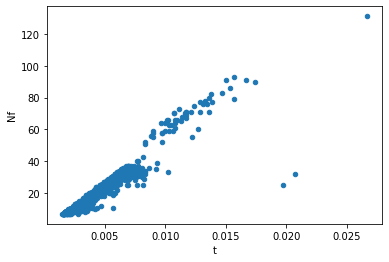

In [6]:
df.plot.scatter(x='t', y='Nf');

In [7]:
res = stats.spearmanr(df['t'], df['Nf'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.9655335667181728, p-value = 0.0


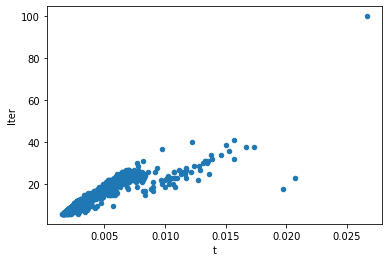

In [8]:
df.plot.scatter(x='t', y='Iter');

In [9]:
res = stats.spearmanr(df['t'], df['Iter'])
print('stat = {}, p-value = {}'.format(*res))

stat = 0.9510263991512226, p-value = 0.0
